In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data

In [2]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/ICBP.JK?period1=1491177600&period2=1648944000&interval=1d&events=history&includeAdjustedClose=true'
icbp = pd.read_csv(url)
icbp['Date'] = pd.to_datetime(icbp['Date'])
icbp = icbp[~icbp.Date.duplicated()]
# icbp = icbp.set_index(['Date']).asfreq('D').fillna(method='ffill')
icbp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,8200.0,8450.0,8200.0,8425.0,7429.060547,2068600.0
1,2017-04-04,8400.0,8425.0,8275.0,8400.0,7407.015625,3444200.0
2,2017-04-05,8400.0,8400.0,8400.0,8400.0,7407.015625,0.0
3,2017-04-06,8300.0,8325.0,8200.0,8225.0,7252.702637,10471800.0
4,2017-04-07,8200.0,8225.0,8150.0,8175.0,7208.612793,7078600.0
...,...,...,...,...,...,...,...
1255,2022-03-28,7250.0,7400.0,7200.0,7275.0,7275.000000,13828500.0
1256,2022-03-29,7300.0,7400.0,7250.0,7300.0,7300.000000,9243600.0
1257,2022-03-30,7350.0,7475.0,7325.0,7375.0,7375.000000,9768800.0
1258,2022-03-31,7400.0,7450.0,7300.0,7350.0,7350.000000,6875300.0


In [ ]:
icbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 78.8 KB


In [ ]:
icbp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,9361.119936,9453.733122,9250.734710,9352.521843,8847.075132,6.206952e+06
std,1048.674051,1057.053850,1033.571492,1046.643271,1077.616521,7.947993e+06
min,7250.000000,7400.000000,7200.000000,7250.000000,7142.479492,0.000000e+00
25%,8675.000000,8750.000000,8550.000000,8650.000000,7962.741455,2.861350e+06
50%,8900.000000,8975.000000,8800.000000,8900.000000,8550.000000,4.626600e+06
75%,10075.000000,10175.000000,9950.000000,10075.000000,9620.093750,7.381550e+06
max,12500.000000,12550.000000,12275.000000,12400.000000,11810.808594,2.044506e+08


In [ ]:
icbp['Date'].min()

Timestamp('2017-04-03 00:00:00')

In [ ]:
# create valid date range
start = icbp['Date'].min()
end = icbp['Date'].max()

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = icbp[(icbp['Date'] >= start) & (icbp['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,8200.0,8450.0,8200.0,8425.0,7429.060547,2068600.0
1,2017-04-10,8400.0,8425.0,8275.0,8400.0,7407.015625,3444200.0
2,2017-04-17,8200.0,8225.0,8100.0,8125.0,7164.523438,7277700.0
3,2017-04-24,8175.0,8200.0,8075.0,8200.0,7230.657715,7389500.0
4,2017-05-01,8450.0,8500.0,8375.0,8500.0,7495.194824,6203900.0


In [ ]:
weekly_rows.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2022-03-07,8500.0,8525.0,8150.0,8250.0,8250.0,21470900.0
258,2022-03-14,7400.0,7600.0,7400.0,7600.0,7600.0,21825800.0
259,2022-03-21,7525.0,7600.0,7375.0,7425.0,7425.0,15064300.0
260,2022-03-28,7475.0,7600.0,7475.0,7475.0,7475.0,4588300.0
261,2022-04-04,7300.0,7400.0,7250.0,7300.0,7300.0,9243600.0


In [ ]:
!pip install plotly==5.6.0

     |████████████████████████████████| 27.7 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=825630794617ba3f623db6f570944e3b426511eace637019d4ea88cee05b1999
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import gc
from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

In [ ]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
# trace3 = go.Scatter(
#     x = weekly_rows['Date'],
#     y = weekly_rows['Adj Close'].astype(float),
#     mode = 'lines',
#     name = 'Adj Close'
# )

layout = dict(
    title='Historical ICBP Prices (2017-2022) with the Slider ',
    hovermode='x',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

# data = [trace1,trace2, trace3]
data = [trace1,trace2]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")
# fig.show()

In [ ]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Volume'].astype(float),
    mode = 'lines',
    name = 'Volume'
)

layout = dict(
    title='Historical ICBP Volume (IDR) (2017-2022) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [ ]:
trace = go.Scattergl(
    y = weekly_rows['Volume'].astype(float),
    x = weekly_rows['Close'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='ICBP Volume v/s IDR',
    xaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compare_webgl')

# Eksplorasi Data

In [3]:
icbp2 = icbp.set_index(['Date']).asfreq('D').fillna(method='ffill')

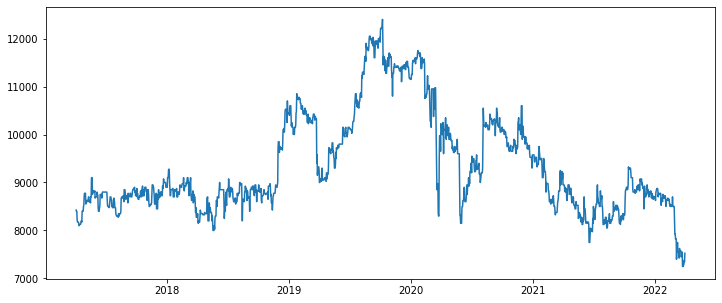

In [4]:
ts = icbp2['Close']
plt.figure(figsize=(12,5))
plt.plot(ts)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


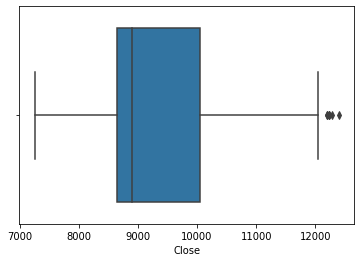

In [ ]:
sns.boxplot(ts)

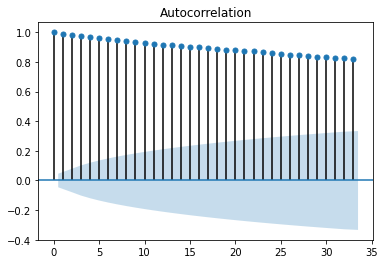

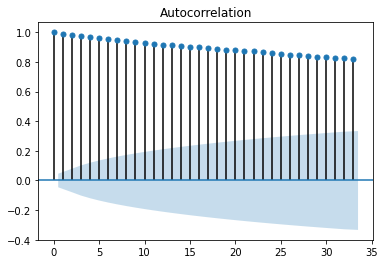

In [ ]:
plot_acf(ts)

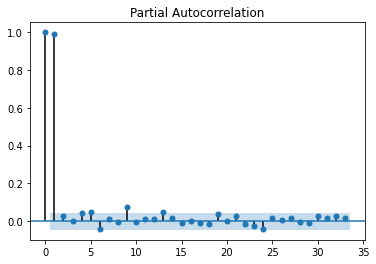

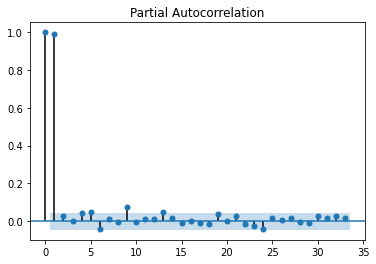

In [ ]:
plot_pacf(ts)

# Split Data

In [5]:
def train_test_split_sequence(ts, prop_train=.8):
  split_point = round(prop_train * len(ts))
  train, test = ts[:split_point+1], ts[split_point+1:]
  return train, test

def input_output_split_sequence(seq, n_steps):
  X, y = [], []
  for i in range(len(seq)):
    end_ix = i + n_steps
    if end_ix > len(seq) - 1:
      break
    seq_x, seq_y = seq[i:end_ix], seq[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

def split_sequence(seq, n_steps=1):
  X, y = [], []
  for i in range(len(seq)-n_steps-1):
    v = seq[i:(i+n_steps), 0]
    X.append(v)
    y.append(seq[i + n_steps, 0])
  return np.array(X), np.array(y)

## Split LSTM

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
ts = icbp2[['Close']]

ts.values

array([[8425.],
       [8400.],
       [8400.],
       ...,
       [7375.],
       [7350.],
       [7525.]])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
ts = scaler.fit_transform(ts)

ts

array([[0.22815534],
       [0.22330097],
       [0.22330097],
       ...,
       [0.02427184],
       [0.01941748],
       [0.05339806]])

In [9]:
ts.shape

(1825, 1)

In [10]:
train, test = train_test_split_sequence(ts)

output = f'''
Train: 
{train.shape}

Text:
{test.shape}
'''
print(output)


Train: 
(1461, 1)

Text:
(364, 1)



In [11]:
X_train, y_train = split_sequence(train, n_steps=5)
X_test, y_test = split_sequence(test, n_steps=5)

output = f'''
X train ({X_train.shape}): 
{X_train}

y train ({y_train.shape}):
{y_train}
'''
print(output)


X train ((1455, 5)): 
[[0.22815534 0.22330097 0.22330097 0.18932039 0.17961165]
 [0.22330097 0.22330097 0.18932039 0.17961165 0.17961165]
 [0.22330097 0.18932039 0.17961165 0.17961165 0.17961165]
 ...
 [0.33009709 0.3592233  0.3592233  0.3592233  0.38349515]
 [0.3592233  0.3592233  0.3592233  0.38349515 0.35436893]
 [0.3592233  0.3592233  0.38349515 0.35436893 0.37864078]]

y train ((1455,)):
[0.17961165 0.17961165 0.17961165 ... 0.35436893 0.37864078 0.33009709]



In [12]:
y_train.shape

(1455,)

In [13]:
X_train.shape

(1455, 5)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
X_train.shape

(1455, 1, 5)

## Split CNN

In [ ]:
ts2 = icbp2[['Close']]

In [ ]:
ts2

Date
2017-04-03    8425.0
2017-04-04    8400.0
2017-04-05    8400.0
2017-04-06    8225.0
2017-04-07    8175.0
               ...  
2022-03-28    7275.0
2022-03-29    7300.0
2022-03-30    7375.0
2022-03-31    7350.0
2022-04-01    7525.0
Freq: D, Name: Close, Length: 1825, dtype: float64

In [ ]:
ts2.shape

(1825, 1)

In [ ]:
ts2 = scaler.fit_transform(ts2)

In [ ]:
train2, test2 = train_test_split_sequence(ts2)

output = f'''
Train: 
{train2}

Text:
{test2}
'''
print(output)


Train: 
[[0.22815534]
 [0.22330097]
 [0.22330097]
 ...
 [0.37864078]
 [0.33009709]
 [0.33009709]]

Text:
[[0.33009709]
 [0.33009709]
 [0.32524272]
 [0.30582524]
 [0.32038835]
 [0.30097087]
 [0.31553398]
 [0.31553398]
 [0.31553398]
 [0.27184466]
 [0.26699029]
 [0.29126214]
 [0.29126214]
 [0.33009709]
 [0.33009709]
 [0.33009709]
 [0.33009709]
 [0.32038835]
 [0.30097087]
 [0.29126214]
 [0.31553398]
 [0.31553398]
 [0.31553398]
 [0.2815534 ]
 [0.26213592]
 [0.25728155]
 [0.26699029]
 [0.2815534 ]
 [0.2815534 ]
 [0.2815534 ]
 [0.25242718]
 [0.24757282]
 [0.24757282]
 [0.24271845]
 [0.23300971]
 [0.23300971]
 [0.23300971]
 [0.26213592]
 [0.24757282]
 [0.24757282]
 [0.24757282]
 [0.24757282]
 [0.24757282]
 [0.24757282]
 [0.19417476]
 [0.2038835 ]
 [0.19902913]
 [0.2184466 ]
 [0.20873786]
 [0.20873786]
 [0.20873786]
 [0.18446602]
 [0.17961165]
 [0.17961165]
 [0.19902913]
 [0.16990291]
 [0.16990291]
 [0.16990291]
 [0.18446602]
 [0.18446602]
 [0.18932039]
 [0.2815534 ]
 [0.23300971]
 [0.23300971

In [ ]:
train2.shape

(1461, 1)

In [ ]:
X_train2, y_train2 = input_output_split_sequence(train2, n_steps=7)
X_test2, y_test2 = input_output_split_sequence(test2, n_steps=7)

output = f'''
X train ({X_train2.shape}): 
{X_train2}

y train ({y_train2.shape}):
{y_train2}
'''
print(output)


X train ((1454, 7, 1)): 
[[[0.22815534]
  [0.22330097]
  [0.22330097]
  ...
  [0.17961165]
  [0.17961165]
  [0.17961165]]

 [[0.22330097]
  [0.22330097]
  [0.18932039]
  ...
  [0.17961165]
  [0.17961165]
  [0.17961165]]

 [[0.22330097]
  [0.18932039]
  [0.17961165]
  ...
  [0.17961165]
  [0.17961165]
  [0.16990291]]

 ...

 [[0.38834951]
  [0.33009709]
  [0.3592233 ]
  ...
  [0.3592233 ]
  [0.38349515]
  [0.35436893]]

 [[0.33009709]
  [0.3592233 ]
  [0.3592233 ]
  ...
  [0.38349515]
  [0.35436893]
  [0.37864078]]

 [[0.3592233 ]
  [0.3592233 ]
  [0.3592233 ]
  ...
  [0.35436893]
  [0.37864078]
  [0.33009709]]]

y train ((1454, 1)):
[[0.17961165]
 [0.16990291]
 [0.16504854]
 ...
 [0.37864078]
 [0.33009709]
 [0.33009709]]



In [ ]:
X_train2.shape

(1454, 7, 1)

# Model

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Reshape
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers.convolutional import Conv1D
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.1 MB/s 


In [20]:
import keras_tuner as kt

## Vanilla LSTM

### Model

In [21]:
def model_builder(hp):
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units_lstm = hp.Int('units_lstm', min_value=32, max_value=512, step=32)
  model.add(LSTM(hp_units_lstm, activation='relu', input_shape=(1, 5)))
  model.add(Dense(1))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mae')

  return model

In [27]:
tuner = kt.RandomSearch(model_builder,
                     objective='val_loss',
                     max_trials=15,
                     seed=42,
                     executions_per_trial=2,
                     directory='icbp',
                     project_name='vanilla-lstm'
                    # # FOR TRAIN ONLY
                    #  overwrite=True
                    # # --------------
                     )

In [28]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 15 Complete [00h 00m 58s]
val_loss: 0.015229515265673399

Best val_loss So Far: 0.015178090892732143
Total elapsed time: 00h 13m 51s
INFO:tensorflow:Oracle triggered exit


In [30]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

tuning = ['units_lstm', 'learning_rate']
print('Best tune:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune:
units_lstm: 288
learning_rate: 0.01


In [32]:
tuner.results_summary(num_trials=15)

Results summary
Results in icbp/vanilla-lstm
Showing 15 best trials
Trial summary
Hyperparameters:
units_lstm: 288
learning_rate: 0.01
Score: 0.015178090892732143
Trial summary
Hyperparameters:
units_lstm: 320
learning_rate: 0.01
Score: 0.015216745901852846
Trial summary
Hyperparameters:
units_lstm: 256
learning_rate: 0.01
Score: 0.01522297877818346
Trial summary
Hyperparameters:
units_lstm: 480
learning_rate: 0.01
Score: 0.015228910837322474
Trial summary
Hyperparameters:
units_lstm: 416
learning_rate: 0.01
Score: 0.015229515265673399
Trial summary
Hyperparameters:
units_lstm: 64
learning_rate: 0.01
Score: 0.015260669402778149
Trial summary
Hyperparameters:
units_lstm: 352
learning_rate: 0.01
Score: 0.015297576319426298
Trial summary
Hyperparameters:
units_lstm: 480
learning_rate: 0.001
Score: 0.015789533965289593
Trial summary
Hyperparameters:
units_lstm: 448
learning_rate: 0.001
Score: 0.015826069749891758
Trial summary
Hyperparameters:
units_lstm: 256
learning_rate: 0.001
Score: 0.

In [33]:
best_hp = tuner.get_best_hyperparameters()[0]
lstm = tuner.hypermodel.build(best_hp)

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 288)               338688    
                                                                 
 dense_1 (Dense)             (None, 1)                 289       
                                                                 
Total params: 338,977
Trainable params: 338,977
Non-trainable params: 0
_________________________________________________________________


In [34]:
historylstm = lstm.fit(X_train, y_train,
                       epochs=50,
                       validation_data=(X_test, y_test), 
                       verbose=2)

Epoch 1/50
46/46 - 2s - loss: 0.0765 - val_loss: 0.0307 - 2s/epoch - 43ms/step
Epoch 2/50
46/46 - 0s - loss: 0.0299 - val_loss: 0.0206 - 387ms/epoch - 8ms/step
Epoch 3/50
46/46 - 0s - loss: 0.0234 - val_loss: 0.0182 - 406ms/epoch - 9ms/step
Epoch 4/50
46/46 - 0s - loss: 0.0229 - val_loss: 0.0174 - 385ms/epoch - 8ms/step
Epoch 5/50
46/46 - 0s - loss: 0.0238 - val_loss: 0.0212 - 372ms/epoch - 8ms/step
Epoch 6/50
46/46 - 0s - loss: 0.0210 - val_loss: 0.0206 - 372ms/epoch - 8ms/step
Epoch 7/50
46/46 - 0s - loss: 0.0222 - val_loss: 0.0156 - 393ms/epoch - 9ms/step
Epoch 8/50
46/46 - 0s - loss: 0.0205 - val_loss: 0.0179 - 392ms/epoch - 9ms/step
Epoch 9/50
46/46 - 0s - loss: 0.0244 - val_loss: 0.0147 - 415ms/epoch - 9ms/step
Epoch 10/50
46/46 - 0s - loss: 0.0212 - val_loss: 0.0148 - 410ms/epoch - 9ms/step
Epoch 11/50
46/46 - 0s - loss: 0.0205 - val_loss: 0.0151 - 392ms/epoch - 9ms/step
Epoch 12/50
46/46 - 0s - loss: 0.0232 - val_loss: 0.0200 - 380ms/epoch - 8ms/step
Epoch 13/50
46/46 - 0s - lo

In [47]:
lstm.save('vanilla_lstm.h5')

### Evaluation

In [35]:
train_predict = lstm.predict(X_train)
test_predict = lstm.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([y_test])

In [36]:
def metrics_evaluation_regression(test, predict):
  metrics = pd.DataFrame({
      'MSE': [mean_squared_error(test, predict)],
      'RMSE': [np.sqrt(mean_squared_error(test, predict))],
      'MAE': [mean_absolute_error(test, predict)],
      'MAPE': [mean_absolute_percentage_error(test, predict)]
  })
  return metrics 

In [39]:
metrics_evaluation_regression(train_y[0], train_predict)

,MSE,RMSE,MAE,MAPE
0,22152.392821,148.836799,103.725105,0.010689


In [38]:
metrics_evaluation_regression(test_y[0], test_predict)

,MSE,RMSE,MAE,MAPE
0,17885.768704,133.737686,88.086988,0.010662


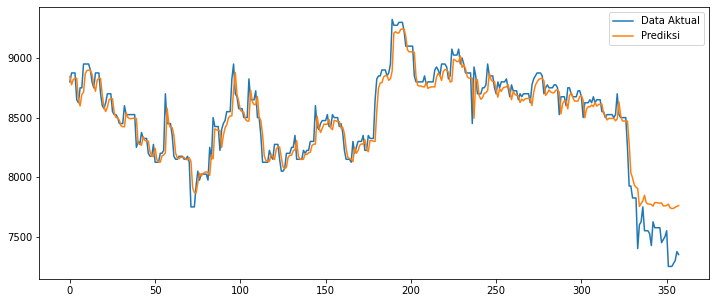

In [42]:
plt.figure(figsize=(12,5))
plt.plot(test_y[0])
plt.plot(test_predict)
plt.legend(['Data Aktual', 'Prediksi'])

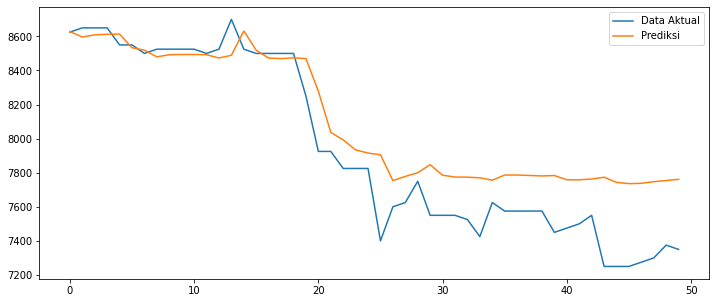

In [43]:
plt.figure(figsize=(12,5))
plt.plot(test_y[0][-50:])
plt.plot(test_predict[-50:])
plt.legend(['Data Aktual', 'Prediksi'])

## CNN-LSTM

### Model

In [ ]:
def cnnlstm_builder(hp):
  n_steps, n_features = 7, 1
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_filter = hp.Int('units_filter', min_value=32, max_value=512, step=32)
  hp_units_lstm = hp.Int('units_lstm', min_value=32, max_value=512, step=32)
  model.add(Reshape((n_steps, n_features), input_dim=n_steps))
  model.add(Conv1D(filters=hp_filter, kernel_size=2, activation='relu'))
  model.add(LSTM(hp_units_lstm, activation='relu'))
  model.add(Dense(1))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mse')

  return model

In [ ]:
cnntuner = kt.RandomSearch(cnnlstm_builder,
                     objective='val_loss',
                     max_trials=10,
                     seed=42,
                     executions_per_trial=2,
                     directory='icbp',
                     project_name='cnn-lstm'
                    # # FOR TRAIN ONLY
                    #  overwrite=True
                    # # --------------
                     )

cnntuner.search(X_train2, y_train2, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=cnntuner.get_best_hyperparameters(num_trials=1)[0]

tuning = ['units_lstm', 'learning_rate', 'units_filter']
print('Best tune:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Trial 10 Complete [00h 06m 47s]
val_loss: 0.0006224343669600785

Best val_loss So Far: 0.0006224343669600785
Total elapsed time: 00h 30m 53s
INFO:tensorflow:Oracle triggered exit
Best tune:
units_lstm: 480
learning_rate: 0.001
units_filter: 352


In [ ]:
cnntuner.results_summary(num_trials=10)

Results summary
Results in icbp/cnn-lstm
Showing 10 best trials
Trial summary
Hyperparameters:
units_filter: 352
units_lstm: 480
learning_rate: 0.001
Score: 0.0006224343669600785
Trial summary
Hyperparameters:
units_filter: 160
units_lstm: 448
learning_rate: 0.001
Score: 0.0006232139421626925
Trial summary
Hyperparameters:
units_filter: 352
units_lstm: 64
learning_rate: 0.001
Score: 0.0006242744566407055
Trial summary
Hyperparameters:
units_filter: 288
units_lstm: 64
learning_rate: 0.001
Score: 0.0006254328473005444
Trial summary
Hyperparameters:
units_filter: 256
units_lstm: 256
learning_rate: 0.001
Score: 0.0006255748739931732
Trial summary
Hyperparameters:
units_filter: 64
units_lstm: 320
learning_rate: 0.01
Score: 0.0006321683467831463
Trial summary
Hyperparameters:
units_filter: 160
units_lstm: 512
learning_rate: 0.0001
Score: 0.0007360121817328036
Trial summary
Hyperparameters:
units_filter: 192
units_lstm: 256
learning_rate: 0.0001
Score: 0.0007574897899758071
Trial summary
Hype

In [ ]:
best_hp = cnntuner.get_best_hyperparameters()[0]
lstmcnn = cnntuner.hypermodel.build(best_hp)

lstmcnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 7, 1)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 352)            1056      
                                                                 
 lstm_2 (LSTM)               (None, 480)               1599360   
                                                                 
 dense_2 (Dense)             (None, 1)                 481       
                                                                 
Total params: 1,600,897
Trainable params: 1,600,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historylstmncnn = lstmcnn.fit(X_train2, y_train2, epochs=50, validation_data=(X_test2, y_test2))

Epoch 1/50
46/46 [==============================] - 10s 182ms/step - loss: 0.0156 - val_loss: 0.0011
Epoch 2/50
46/46 [==============================] - 7s 159ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/50
46/46 [==============================] - 7s 160ms/step - loss: 0.0015 - val_loss: 8.6036e-04
Epoch 4/50
46/46 [==============================] - 8s 173ms/step - loss: 0.0014 - val_loss: 8.1088e-04
Epoch 5/50
46/46 [==============================] - 7s 161ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/50
46/46 [==============================] - 4s 95ms/step - loss: 0.0013 - val_loss: 9.1165e-04
Epoch 7/50
46/46 [==============================] - 4s 95ms/step - loss: 0.0012 - val_loss: 6.8438e-04
Epoch 8/50
46/46 [==============================] - 4s 93ms/step - loss: 0.0011 - val_loss: 7.2543e-04
Epoch 9/50
46/46 [==============================] - 4s 92ms/step - loss: 0.0010 - val_loss: 5.8772e-04
Epoch 10/50
46/46 [==============================] - 4s 91ms/step - loss: 0.001

In [ ]:
from pandas.core.common import flatten
lstmcnn = Sequential()

lstmcnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
lstmcnn.add(LSTM(64, activation='relu'))
# lstmcnn.add(Dense(64, activation='relu'))
lstmcnn.add(Dense(1))

lstmcnn.compile(loss='mae', optimizer=keras.optimizers.Adam(learning_rate=0.001))

lstmcnn.build(input_shape=(None, 7, 1))
lstmcnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             192       
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,281
Trainable params: 33,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historylstmncnn = lstmcnn.fit(X_train2, y_train2, epochs=50, validation_data=(X_test2, y_test2))

Epoch 1/150
46/46 [==============================] - 2s 13ms/step - loss: 0.1724 - val_loss: 0.0742
Epoch 2/150
46/46 [==============================] - 0s 8ms/step - loss: 0.0324 - val_loss: 0.0255
Epoch 3/150
46/46 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0277
Epoch 4/150
46/46 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.0236
Epoch 5/150
46/46 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0269
Epoch 6/150
46/46 [==============================] - 0s 8ms/step - loss: 0.0252 - val_loss: 0.0209
Epoch 7/150
46/46 [==============================] - 0s 8ms/step - loss: 0.0238 - val_loss: 0.0249
Epoch 8/150
46/46 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0196
Epoch 9/150
46/46 [==============================] - 0s 8ms/step - loss: 0.0233 - val_loss: 0.0190
Epoch 10/150
46/46 [==============================] - 0s 7ms/step - loss: 0.0229 - val_loss: 0.0187
Epoch 11

In [ ]:
lstmcnn.save('cnn_lstm.h5')

### Evaluation

In [ ]:
cnn_train = lstmcnn.predict(X_train2)
cnn_test = lstmcnn.predict(X_test2)

cnn_train = scaler.inverse_transform(cnn_train)
train_y = scaler.inverse_transform(y_train2)
cnn_test = scaler.inverse_transform(cnn_test)
test_y = scaler.inverse_transform(y_test2)

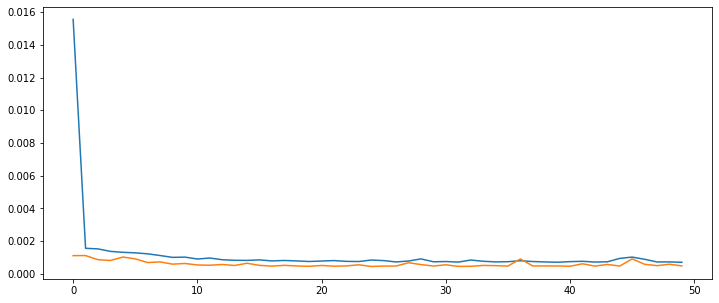

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(historylstmncnn.history['loss'][:50])
plt.plot(historylstmncnn.history['val_loss'][:50])

In [ ]:
def metrics_evaluation_regression(test, predict):
  metrics = pd.DataFrame({
      'MSE': [mean_squared_error(test, predict)],
      'RMSE': [np.sqrt(mean_squared_error(test, predict))],
      'MAE': [mean_absolute_error(test, predict)],
      'MAPE': [mean_absolute_percentage_error(test, predict)]
  })
  return metrics 

In [ ]:
metrics_evaluation_regression(train_y, cnn_train)

,MSE,RMSE,MAE,MAPE
0,20078.270683,141.697815,93.694942,0.009674


In [ ]:
metrics_evaluation_regression(test_y, cnn_test)

,MSE,RMSE,MAE,MAPE
0,12760.899004,112.964149,74.496257,0.008924


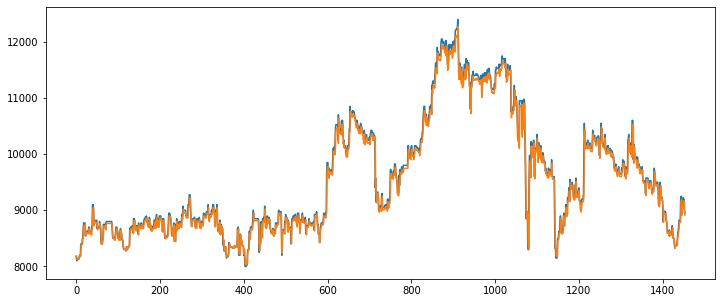

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train_y)
plt.plot(cnn_train)

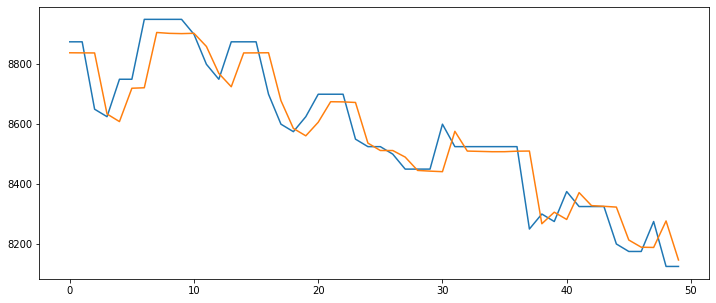

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test_y[:50])
plt.plot(cnn_test[:50])

## BiLSTM

### Model

In [44]:
def bilstm_builder(hp):
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units_lstm = hp.Int('units_lstm', min_value=32, max_value=512, step=32)
  model.add(Bidirectional(LSTM(hp_units_lstm, activation='relu', input_shape=(1, 5))))
  model.add(Dense(1))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mae')

  return model

In [45]:
bilstmtuner = kt.RandomSearch(bilstm_builder,
                     objective='val_loss',
                     max_trials=15,
                     seed=42,
                     executions_per_trial=2,
                     directory='icbp',
                     project_name='bi-lstm'
                    # # FOR TRAIN ONLY
                    #  overwrite=True
                    # # --------------
                     )

In [46]:
bilstmtuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 15 Complete [00h 02m 50s]
val_loss: 0.015397540293633938

Best val_loss So Far: 0.015135553665459156
Total elapsed time: 00h 22m 25s
INFO:tensorflow:Oracle triggered exit


In [48]:
# Get the optimal hyperparameters
best_hps=bilstmtuner.get_best_hyperparameters(num_trials=1)[0]

tuning = ['units_lstm', 'learning_rate']
print('Best tune:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune:
units_lstm: 256
learning_rate: 0.01


In [50]:
bilstmtuner.results_summary(num_trials=15)

Results summary
Results in icbp/bi-lstm
Showing 15 best trials
Trial summary
Hyperparameters:
units_lstm: 256
learning_rate: 0.01
Score: 0.015135553665459156
Trial summary
Hyperparameters:
units_lstm: 352
learning_rate: 0.01
Score: 0.015270082280039787
Trial summary
Hyperparameters:
units_lstm: 64
learning_rate: 0.01
Score: 0.015275361947715282
Trial summary
Hyperparameters:
units_lstm: 480
learning_rate: 0.01
Score: 0.015275718178600073
Trial summary
Hyperparameters:
units_lstm: 320
learning_rate: 0.01
Score: 0.01527688279747963
Trial summary
Hyperparameters:
units_lstm: 288
learning_rate: 0.01
Score: 0.015368693508207798
Trial summary
Hyperparameters:
units_lstm: 416
learning_rate: 0.01
Score: 0.015397540293633938
Trial summary
Hyperparameters:
units_lstm: 480
learning_rate: 0.001
Score: 0.01541871763765812
Trial summary
Hyperparameters:
units_lstm: 448
learning_rate: 0.001
Score: 0.015420617070049047
Trial summary
Hyperparameters:
units_lstm: 256
learning_rate: 0.001
Score: 0.015448

In [51]:
best_hp = bilstmtuner.get_best_hyperparameters()[0]
bilstm = bilstmtuner.hypermodel.build(best_hp)

# bilstm.summary()

In [52]:
historybilstm = bilstm.fit(X_train, y_train, 
                       epochs=50,
                       validation_data=(X_test, y_test), 
                       verbose=2)

Epoch 1/50
46/46 - 3s - loss: 0.0698 - val_loss: 0.0224 - 3s/epoch - 74ms/step
Epoch 2/50
46/46 - 1s - loss: 0.0350 - val_loss: 0.0196 - 527ms/epoch - 11ms/step
Epoch 3/50
46/46 - 0s - loss: 0.0263 - val_loss: 0.0296 - 495ms/epoch - 11ms/step
Epoch 4/50
46/46 - 0s - loss: 0.0226 - val_loss: 0.0167 - 490ms/epoch - 11ms/step
Epoch 5/50
46/46 - 1s - loss: 0.0207 - val_loss: 0.0190 - 509ms/epoch - 11ms/step
Epoch 6/50
46/46 - 1s - loss: 0.0220 - val_loss: 0.0180 - 515ms/epoch - 11ms/step
Epoch 7/50
46/46 - 1s - loss: 0.0213 - val_loss: 0.0152 - 527ms/epoch - 11ms/step
Epoch 8/50
46/46 - 0s - loss: 0.0225 - val_loss: 0.0183 - 492ms/epoch - 11ms/step
Epoch 9/50
46/46 - 1s - loss: 0.0276 - val_loss: 0.0166 - 512ms/epoch - 11ms/step
Epoch 10/50
46/46 - 0s - loss: 0.0243 - val_loss: 0.0196 - 499ms/epoch - 11ms/step
Epoch 11/50
46/46 - 1s - loss: 0.0206 - val_loss: 0.0153 - 590ms/epoch - 13ms/step
Epoch 12/50
46/46 - 1s - loss: 0.0223 - val_loss: 0.0167 - 596ms/epoch - 13ms/step
Epoch 13/50
46/4

In [ ]:
bilstm = Sequential()
bilstm.add(Bidirectional(LSTM(4, input_shape=(1, 7))))
bilstm.add(Dense(1))

bilstm.compile(loss='mae', optimizer='adam')

# bilstm.summary()

In [ ]:
historylstm = bilstm.fit(X_train, y_train, 
                       batch_size=1, 
                       epochs=50, 
                       validation_data=(X_test, y_test), 
                       verbose=2)

Epoch 1/50
1453/1453 - 6s - loss: 0.0357 - val_loss: 0.0208 - 6s/epoch - 4ms/step
Epoch 2/50
1453/1453 - 2s - loss: 0.0250 - val_loss: 0.0221 - 2s/epoch - 1ms/step
Epoch 3/50
1453/1453 - 2s - loss: 0.0237 - val_loss: 0.0188 - 2s/epoch - 1ms/step
Epoch 4/50
1453/1453 - 5s - loss: 0.0223 - val_loss: 0.0191 - 5s/epoch - 4ms/step
Epoch 5/50
1453/1453 - 4s - loss: 0.0205 - val_loss: 0.0168 - 4s/epoch - 3ms/step
Epoch 6/50
1453/1453 - 4s - loss: 0.0198 - val_loss: 0.0200 - 4s/epoch - 3ms/step
Epoch 7/50
1453/1453 - 4s - loss: 0.0192 - val_loss: 0.0157 - 4s/epoch - 3ms/step
Epoch 8/50
1453/1453 - 4s - loss: 0.0187 - val_loss: 0.0150 - 4s/epoch - 3ms/step
Epoch 9/50
1453/1453 - 4s - loss: 0.0190 - val_loss: 0.0171 - 4s/epoch - 3ms/step
Epoch 10/50
1453/1453 - 3s - loss: 0.0185 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 11/50
1453/1453 - 4s - loss: 0.0190 - val_loss: 0.0147 - 4s/epoch - 3ms/step
Epoch 12/50
1453/1453 - 3s - loss: 0.0182 - val_loss: 0.0162 - 3s/epoch - 2ms/step
Epoch 13/50
1

In [61]:
bilstm.save('bi_lstm.h5')

### Evaluation

In [53]:
train_predict2 = bilstm.predict(X_train)
test_predict2 = bilstm.predict(X_test)

train_predict2 = scaler.inverse_transform(train_predict2)
# train_y = scaler.inverse_transform([y_train])
test_predict2 = scaler.inverse_transform(test_predict2)
# test_y = scaler.inverse_transform([y_test])

In [54]:
def metrics_evaluation_regression(test, predict):
  metrics = pd.DataFrame({
      'MSE': [mean_squared_error(test, predict)],
      'RMSE': [np.sqrt(mean_squared_error(test, predict))],
      'MAE': [mean_absolute_error(test, predict)],
      'MAPE': [mean_absolute_percentage_error(test, predict)]
  })
  return metrics 

In [55]:
metrics_evaluation_regression(train_y[0], train_predict2)

,MSE,RMSE,MAE,MAPE
0,21715.364981,147.361342,93.573805,0.009628


In [56]:
metrics_evaluation_regression(test_y[0], test_predict2)

,MSE,RMSE,MAE,MAPE
0,21494.243172,146.609151,87.971536,0.010781


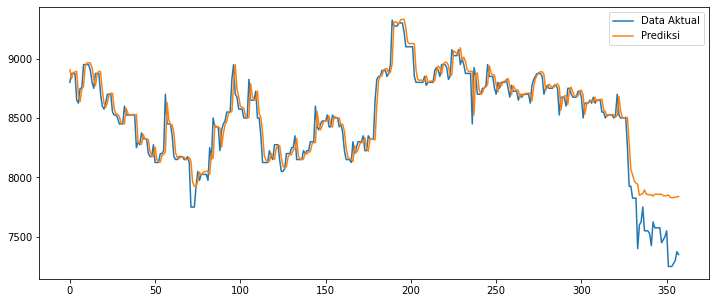

In [60]:
plt.figure(figsize=(12,5))
plt.plot(test_y[0])
plt.plot(test_predict2)
plt.legend(['Data Aktual', 'Prediksi'])

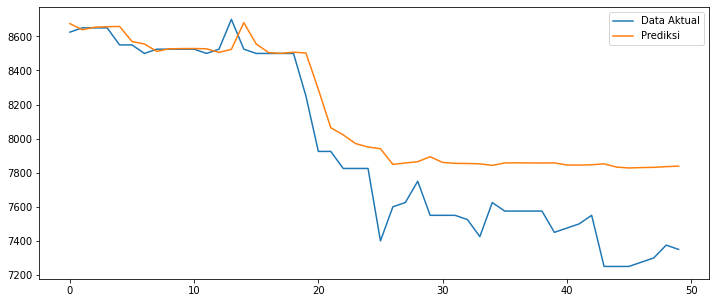

In [59]:
plt.figure(figsize=(12,5))
plt.plot(test_y[0][-50:])
plt.plot(test_predict2[-50:])
plt.legend(['Data Aktual', 'Prediksi'])

# Perbandingan

## Vanilla

In [ ]:
metrics_evaluation_regression(train_y[0], train_predict)

,MSE,RMSE,MAE,MAPE
0,22317.417773,149.390153,100.44915,0.010407


In [ ]:
metrics_evaluation_regression(test_y[0], test_predict)

,MSE,RMSE,MAE,MAPE
0,14976.625376,122.379023,87.167432,0.010493


## CNN-LSTM

In [ ]:
metrics_evaluation_regression(y_train2, lstmcnn.predict(X_train2))

,MSE,RMSE,MAE,MAPE
0,19680.56353,140.287432,84.143688,0.008833


In [ ]:
metrics_evaluation_regression(y_test2, lstmcnn.predict(X_test2))

,MSE,RMSE,MAE,MAPE
0,11903.910186,109.105042,71.649232,0.008518


## BiLSTM

In [ ]:
metrics_evaluation_regression(train_y[0], train_predict2)

,MSE,RMSE,MAE,MAPE
0,17973.617383,134.06572,78.633088,0.008204


In [ ]:
metrics_evaluation_regression(test_y[0], test_predict2)

,MSE,RMSE,MAE,MAPE
0,11413.950255,106.836091,67.162503,0.008017


## Chart 

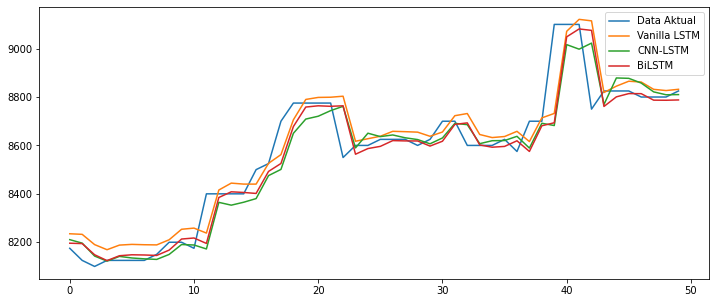

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train_y[0][:50])
plt.plot(train_predict[:50])
plt.plot(cnn_train[:50])
plt.plot(train_predict2[:50])
plt.legend(['Data Aktual', 'Vanilla LSTM', 'CNN-LSTM', 'BiLSTM'])

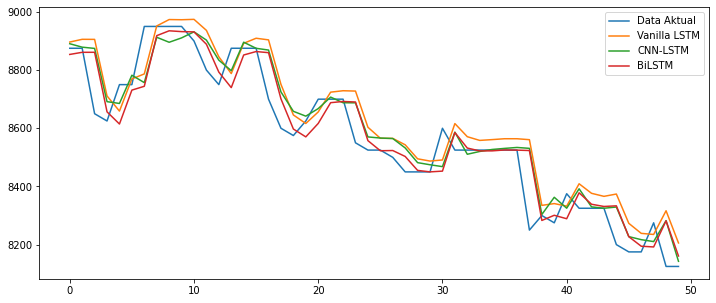

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test_y[0][:50])
plt.plot(test_predict[:50])
plt.plot(cnn_test[:50])
plt.plot(test_predict2[:50])
plt.legend(['Data Aktual', 'Vanilla LSTM', 'CNN-LSTM', 'BiLSTM'])

In [ ]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = test_y[0].astype(float),
    mode = 'lines',
    name = 'Data Aktual'
)

trace2 = go.Scatter(
    x = weekly_rows['Date'],
    y = np.ravel(test_predict).astype(float),
    mode = 'lines',
    name = 'Vanilla LSTM'
)

trace3 = go.Scatter(
    x = weekly_rows['Date'],
    y = np.ravel(cnn_test).astype(float),
    mode = 'lines',
    name = 'CNN-LSTM'
)

trace4 = go.Scatter(
    x = weekly_rows['Date'],
    y = np.ravel(test_predict2).astype(float),
    mode = 'lines',
    name = 'Bi-LSTM'
)

layout = dict(
    title='ICBP Prices Test Prediction (2017-2022) with the Slider ',
    hovermode='x',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

# data = [trace1,trace2, trace3]
data = [trace1,trace2,trace3,trace4]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")
# fig.show()

# Feature Importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring="r2", random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = [f'lag-{7-i}' for i in range(7)])

Weight,Feature
0.0700 ± 0.0144,lag-2
0.0683 ± 0.0113,lag-5
0.0652 ± 0.0146,lag-4
0.0651 ± 0.0129,lag-6
0.0612 ± 0.0104,lag-3
0.0227 ± 0.0025,lag-1
0.0108 ± 0.0018,lag-7


In [ ]:
 [f'lag-{7-i}' for i in range(7)]

['lag-7', 'lag-6', 'lag-5', 'lag-4', 'lag-3', 'lag-2', 'lag-1']

# Hyperparameter Tuning

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.2 MB/s 


In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  n_steps, n_features = 7, 1
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_filter = hp.Int('units_filter', min_value=8, max_value=512, step=32)
  hp_units_lstm = hp.Int('units_lstm', min_value=8, max_value=512, step=32)
  hp_units_dense = hp.Int('units_dense', min_value=8, max_value=512, step=32)
  model.add(Reshape((n_steps, n_features), input_dim=n_steps))
  model.add(Conv1D(filters=hp_filter, kernel_size=2, activation='relu'))
  model.add(LSTM(hp_units_lstm, activation='relu'))
  model.add(Dense(hp_units_dense, activation='relu'))
  model.add(Dense(1))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mse')

  return model

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
n_steps, n_features = 7, 1
X, y = input_output_split_sequence(ts, n_steps)

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='cnn-lstm_model',
                     project_name='during_covid',
                    # # FOR TRAIN ONLY
                    #  overwrite=True
                    # # --------------
                     )

tuner.search(X, y, epochs=50, callbacks=[stop_early], validation_split=0.2,)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

tuning = ['units_filter', 'units_lstm', 'units_dense', 'learning_rate']
print('Best tune:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune:
units_filter: 72
units_lstm: 296
units_dense: 296
learning_rate: 0.01


## Skenario Penelitian

**Hyperparameter:** dari Hyperband atau RandomSearch untuk masing-masing arsitektur

**Epoch:** Jumlah epoch kelipatan 50 (3-5 jenis epoch)

**Time Steps:** 5 jenis(?) dengan epoch yg terbaik untuk masing2 arsitektur.